In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

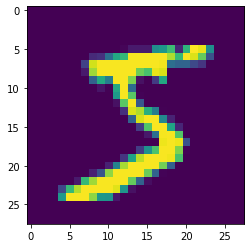

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [6]:
x_train =x_train/255
x_test=x_test/255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
hist = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2745 - accuracy: 0.9206 - val_loss: 0.1448 - val_accuracy: 0.9582
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1160 - accuracy: 0.9656 - val_loss: 0.1153 - val_accuracy: 0.9657
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9753 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.1006 - val_accuracy: 0.9710
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.0934 - val_accuracy: 0.9731
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.1087 - val_accuracy: 0.9693
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.1039 - val_accuracy:

In [12]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [13]:
y_pred=y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9787

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

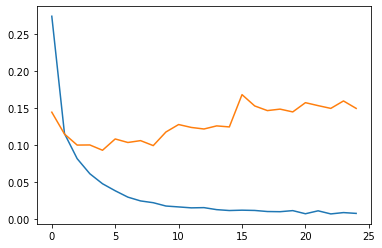

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

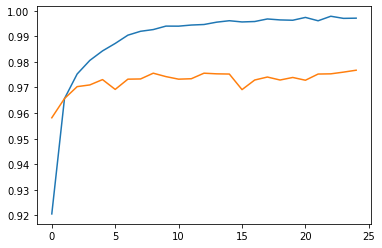

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

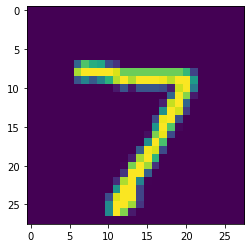

In [22]:
plt.imshow(x_test[0])

In [23]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([7], dtype=int64)

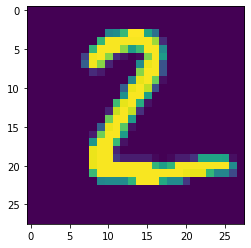

In [24]:
plt.imshow(x_test[1])

In [25]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2], dtype=int64)